# Preprocessing of Raw Data

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [180]:
data = pd.read_csv('heart_2020_cleaned.csv')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [182]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Text(0.5, 1.0, 'Boxplot of BMI Distribution')

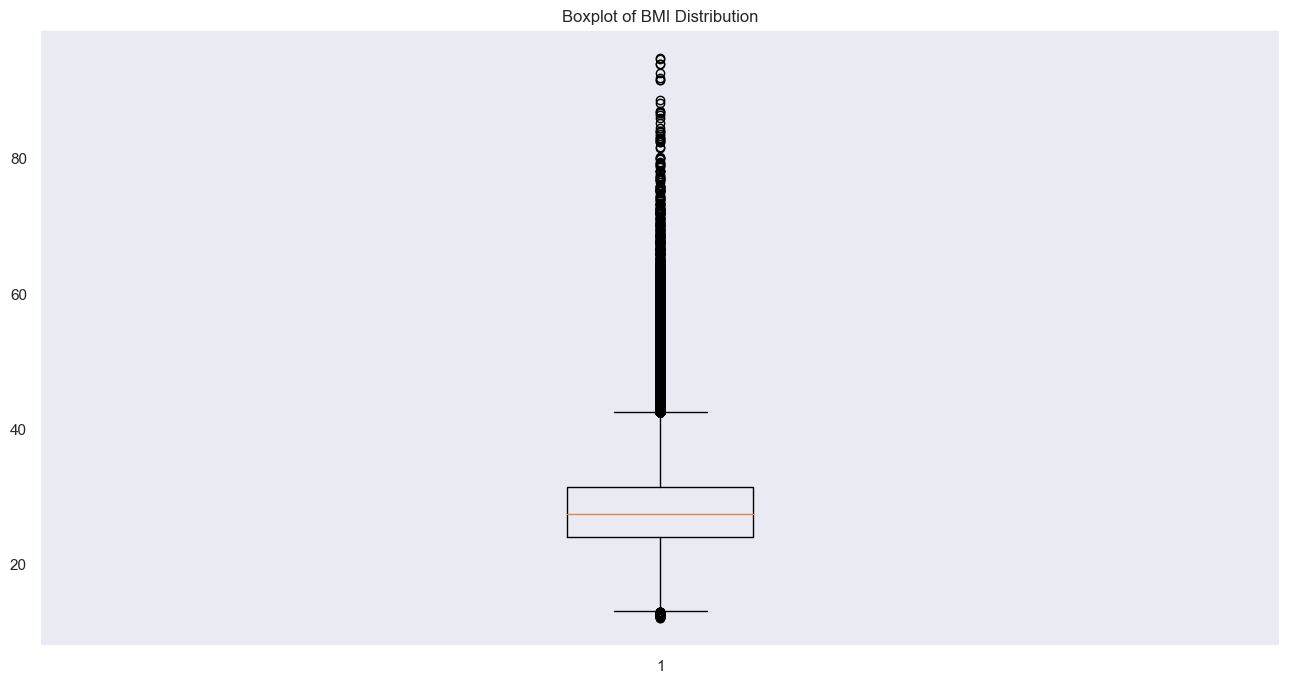

In [183]:
plt.figure(figsize=(16,8))
plt.boxplot(data['BMI'])
plt.title('Boxplot of BMI Distribution')

Text(0.5, 1.0, 'Boxplot of Average Sleep Time Distribution')

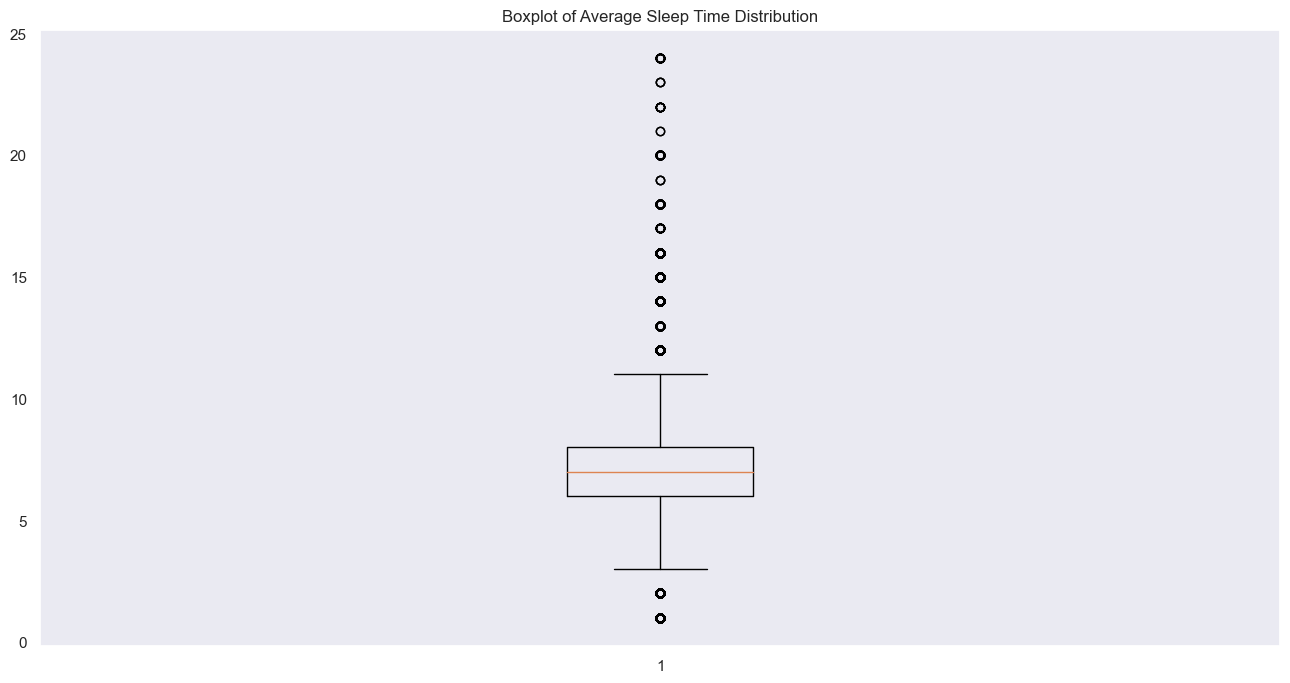

In [184]:
plt.figure(figsize=(16,8))
plt.boxplot(data['SleepTime'])
plt.title('Boxplot of Average Sleep Time Distribution')

From above, we can see that there are outliers for variables BMI and SleepTIme

In [185]:
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Handling outliers using capping

### Removing BMI that are extreme, values bigger than 3 times the inter-quatile range from the 75th percentile

In [186]:
upper_Q = data['BMI'].describe()['75%']
lower_Q = data['BMI'].describe()['25%']
IQR = upper_Q - lower_Q
BMI_limit = upper_Q + (IQR * 3)

In [187]:
BMI_limit

53.59

In [188]:
df_filtered = data[data['BMI'] <= BMI_limit]

In [189]:
df_filtered['HeartDisease'].value_counts()

No     291247
Yes     27230
Name: HeartDisease, dtype: int64

### Removing average sleep time that are extreme, values bigger than 3 times the inter-quatile range from the 75th percentile

In [190]:
upper_Q = data['SleepTime'].describe()['75%']
lower_Q = data['SleepTime'].describe()['25%']
IQR = upper_Q - lower_Q
Sleep_limit = upper_Q + (IQR * 3)

In [191]:
Sleep_limit

14.0

In [192]:
df = df_filtered[df_filtered['SleepTime'] <= Sleep_limit]

In [193]:
df['HeartDisease'].value_counts()

No     290701
Yes     27127
Name: HeartDisease, dtype: int64

In [194]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317828 entries, 0 to 317827
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      317828 non-null  object 
 1   BMI               317828 non-null  float64
 2   Smoking           317828 non-null  object 
 3   AlcoholDrinking   317828 non-null  object 
 4   Stroke            317828 non-null  object 
 5   PhysicalHealth    317828 non-null  float64
 6   MentalHealth      317828 non-null  float64
 7   DiffWalking       317828 non-null  object 
 8   Sex               317828 non-null  object 
 9   AgeCategory       317828 non-null  object 
 10  Race              317828 non-null  object 
 11  Diabetic          317828 non-null  object 
 12  PhysicalActivity  317828 non-null  object 
 13  GenHealth         317828 non-null  object 
 14  SleepTime         317828 non-null  float64
 15  Asthma            317828 non-null  object 
 16  KidneyDisease     31

In [196]:
def split_columns_by_Dtypes(df):
    binary_lst = []
    categorical_lst = []
    num_lst = []
    for name in df.columns:
        length = len(df[name].unique())
        if df[name].dtype != 'object':
            num_lst.append(name)
        elif length == 2:
            binary_lst.append(name)
        else:
            categorical_lst.append(name)
    return binary_lst, categorical_lst, num_lst

In [197]:
binary_lst, categorical_lst, num_lst = split_columns_by_Dtypes(df)

In [198]:
print(binary_lst)
print(categorical_lst)
print(num_lst)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
['AgeCategory', 'Race', 'Diabetic', 'GenHealth']
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


In [199]:
def convert_binary(df, columns):
    for name in columns:
        encoder = LabelEncoder()
        df[name] = encoder.fit_transform(df[name])
    return df

In [200]:
def oneHotEncode(df, lst):
    ohe = OneHotEncoder()
    output_array = ohe.fit_transform(df[lst]).toarray()
    df[ohe.get_feature_names_out()] = output_array
    return df

In [201]:
def scaler(df,columns):
    BMI = []
    P_health = []
    M_health = []
    sleeptime = []
    scaler = StandardScaler()
    output = scaler.fit_transform(df[columns])
    for row in output:
        BMI.append(row[0])
        P_health.append(row[1])
        M_health.append(row[2])
        sleeptime.append(row[3])
    df['BMI'] = BMI
    df['PhysicalHealth'] = P_health
    df['MentalHealth'] = M_health
    df['SleepTime'] = sleeptime
    return df

In [202]:
convert_binary(df, binary_lst)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317823,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
317824,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,No,1,Very good,5.0,1,0,0
317825,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,No,1,Good,6.0,0,0,0
317826,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,No,0,Good,12.0,0,0,0


In [203]:
oneHotEncode(df,categorical_lst)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317823,1,27.41,1,0,0,7.0,0.0,1,1,60-64,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
317824,0,29.84,1,0,0,0.0,0.0,0,1,35-39,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
317825,0,24.24,0,0,0,0.0,0.0,0,0,45-49,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
317826,0,32.81,0,0,0,0.0,0.0,0,0,25-29,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [204]:
scaler(df, num_lst)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,-1.929436,1,0,0,-0.041864,3.299087,0,0,55-59,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,-1.306851,0,0,1,-0.421709,-0.488620,0,0,80 or older,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,-0.268100,1,0,0,2.110587,3.299087,0,1,65-69,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.662626,0,0,0,-0.421709,-0.488620,0,0,75-79,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,-0.745859,0,0,0,3.123505,-0.488620,1,0,40-44,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317823,1,-0.129933,1,0,0,0.464595,-0.488620,1,1,60-64,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
317824,0,0.274581,1,0,0,-0.421709,-0.488620,0,1,35-39,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
317825,0,-0.657632,0,0,0,-0.421709,-0.488620,0,0,45-49,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
317826,0,0.768987,0,0,0,-0.421709,-0.488620,0,0,25-29,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [205]:
df.drop(categorical_lst, axis=1, inplace=True)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317828 entries, 0 to 317827
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         317828 non-null  int32  
 1   BMI                                  317828 non-null  float64
 2   Smoking                              317828 non-null  int32  
 3   AlcoholDrinking                      317828 non-null  int32  
 4   Stroke                               317828 non-null  int32  
 5   PhysicalHealth                       317828 non-null  float64
 6   MentalHealth                         317828 non-null  float64
 7   DiffWalking                          317828 non-null  int32  
 8   Sex                                  317828 non-null  int32  
 9   PhysicalActivity                     317828 non-null  int32  
 10  SleepTime                            317828 non-null  float64
 11  Asthma       

In [207]:
df.to_csv('heart_2020_encoded.csv')

# Data Preparing

In [208]:
# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from copy import deepcopy

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings 
warnings.filterwarnings('ignore')

In [209]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))    
    print("F2: ", fbeta_score(y_test, y_pred,beta=2))


In [210]:
def train_model(X_train, X_test, y_train, y_test, classifier):

    # build model on train set
    C = classifier
    C.fit(X_train, y_train)

    # predict on validation set
    y_preds = C.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)
    Acc = accuracy_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    return Acc, Recall, F2

In [211]:
x_var = [i for i in list(df.columns) if i != 'HeartDisease']
x_var

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer',
 'AgeCategory_18-24',
 'AgeCategory_25-29',
 'AgeCategory_30-34',
 'AgeCategory_35-39',
 'AgeCategory_40-44',
 'AgeCategory_45-49',
 'AgeCategory_50-54',
 'AgeCategory_55-59',
 'AgeCategory_60-64',
 'AgeCategory_65-69',
 'AgeCategory_70-74',
 'AgeCategory_75-79',
 'AgeCategory_80 or older',
 'Race_American Indian/Alaskan Native',
 'Race_Asian',
 'Race_Black',
 'Race_Hispanic',
 'Race_Other',
 'Race_White',
 'Diabetic_No',
 'Diabetic_No, borderline diabetes',
 'Diabetic_Yes',
 'Diabetic_Yes (during pregnancy)',
 'GenHealth_Excellent',
 'GenHealth_Fair',
 'GenHealth_Good',
 'GenHealth_Poor',
 'GenHealth_Very good']

In [212]:
y_var = 'HeartDisease'

## Split Train, Validation and Test Data

In [213]:
X, X_test, y, y_test = train_test_split(df[x_var], df[y_var], test_size=0.2, random_state=19, stratify=df[y_var])

In [214]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=19, stratify=y)

In [215]:
X_train.shape

(203409, 41)

In [216]:
X_val.shape

(50853, 41)

In [217]:
X_test.shape

(63566, 41)

# Training models

### Logstics Regression

In [218]:
LR = LogisticRegression(random_state=19)

In [219]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[46109   404]
 [ 3892   448]]
TN: 46109, FP: 404, FN: 3892, TP: 448


Accuracy:  0.9155212081883075
Recall:  0.1032258064516129
F2:  0.12299582692730068


(0.9155212081883075, 0.1032258064516129, 0.12299582692730068)

### Linear SVC

In [220]:
svc = LinearSVC(random_state=19)

In [221]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[46373   140]
 [ 4143   197]]
TN: 46373, FP: 140, FN: 4143, TP: 197


Accuracy:  0.9157768469903447
Recall:  0.045391705069124426
F2:  0.0556591512685766


(0.9157768469903447, 0.045391705069124426, 0.0556591512685766)

### XGB Classifier

In [222]:
xgb = XGBClassifier(random_state=19)

In [223]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[46091   422]
 [ 3922   418]]
TN: 46091, FP: 422, FN: 3922, TP: 418


Accuracy:  0.914577311073093
Recall:  0.09631336405529954
F2:  0.11483516483516483


(0.914577311073093, 0.09631336405529954, 0.11483516483516483)

### Random Forest Classifier

In [224]:
rndF = RandomForestClassifier(random_state=19)

In [225]:
train_model(X_train, X_val, y_train, y_val, rndF)

Confusion Matrix: 
 [[45472  1041]
 [ 3806   534]]
TN: 45472, FP: 1041, FN: 3806, TP: 534


Accuracy:  0.904686055886575
Recall:  0.12304147465437788
F2:  0.14100871402165302


(0.904686055886575, 0.12304147465437788, 0.14100871402165302)

### Voting Class Ensemble

In [226]:
vc = VotingClassifier(
    estimators=[('LinearSVC',svc),('RForest',rndF),('XGB',xgb),('LR',LR)],
    voting='hard'
)

In [227]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[46327   186]
 [ 4097   243]]
TN: 46327, FP: 186, FN: 4097, TP: 243


Accuracy:  0.9157768469903447
Recall:  0.05599078341013825
F2:  0.06830063522401486


(0.9157768469903447, 0.05599078341013825, 0.06830063522401486)

# Imbalance Data Handling with SMOTE, SMOTEENN and class weighing

### Define Functions

In [228]:
# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

import os
import pickle

In [229]:
def train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier):

    auc_scores = [] # AUC scores
    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels
    
    X_test = X_val
    y_test = y_val
        
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smote, y_res_smote)

    # predict on validation set
    y_preds = clf.predict(X_test)
    all_y_preds.extend(y_preds)
    all_y_true.extend(y_test)

    # Evaluate results
    evaluate_results(all_y_true, all_y_preds)
    Acc = accuracy_score(all_y_true, all_y_preds)
    F2 = fbeta_score(all_y_true, all_y_preds, beta=2)
    Recall = recall_score(all_y_true, all_y_preds)
    return Acc, Recall, F2

In [230]:
def train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier):

    auc_scores = [] # AUC scores
    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels

        
    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)
    all_y_preds.extend(y_preds)
    all_y_true.extend(y_val)

    # Evaluate results
    evaluate_results(all_y_true, all_y_preds)
    Acc = accuracy_score(all_y_true, all_y_preds)
    F2 = fbeta_score(all_y_true, all_y_preds, beta=2)
    Recall = recall_score(all_y_true, all_y_preds)
    return Acc, Recall, F2

In [231]:
def train_data_with_weights_val(X_train, X_val, y_train, y_val, classifier):

    auc_scores = [] # AUC scores
    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels
    
    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)
    all_y_preds.extend(y_preds)
    all_y_true.extend(y_test)

    # Evaluate results
    evaluate_results(all_y_true, all_y_preds)
    Acc = accuracy_score(all_y_true, all_y_preds)
    F2 = fbeta_score(all_y_true, all_y_preds, beta=2)
    Recall = recall_score(all_y_true, all_y_preds)
    return Acc, Recall, F2

In [232]:
def get_performance_visualisation(method, X_val, y_val, classifier, dic):
    Acc_lst, F2_lst, Recall_lst, resampling = [], [], [], []
    if method == "SMOTEENN":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            train_lst = dic[sampling]
            Acc, Recall, F2 = train_model(train_lst[0], X_val, train_lst[1], y_val, classifier)
            Acc_lst.append(Acc)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            print()
        df = pd.DataFrame(columns=['Accuracy','F2 Score','Recall'])
        df['Accuracy'] = Acc_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Accuracy','F2 Score','Recall'],
            title= 'Resampling Performance',
            ylim=[0,1])

    elif method == "SMOTE":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            train_lst = dic[sampling]
            Acc, Recall, F2 = train_model(train_lst[0], X_val, train_lst[1], y_val, classifier)
            Acc_lst.append(Acc)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            print()
        df = pd.DataFrame(columns=['Accuracy','F2 Score','Recall'])
        df['Accuracy'] = Acc_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Accuracy','F2 Score','Recall'],
            title= 'Resampling Performance',ylim=[0,1])
    return df

In [233]:
def get_performance_weighing(method, X_train, X_val, y_train, y_val, classifier):
    Acc_lst, F2_lst, Recall_lst = [], [], []
    if method == "scale":
        for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, scale_pos_weight=i)
            Acc, Recall, F2 = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Acc_lst.append(Acc)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            print()
    elif method == 'dict':
         for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, class_weight = {0:1, 1:i})
            Acc, Recall, F2 = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Acc_lst.append(Acc)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            print()  
    df = pd.DataFrame(columns=['Accuracy','F2 Score','Recall'])
    df['Accuracy'] = Acc_lst
    df['F2 Score'] = F2_lst
    df['Recall'] = Recall_lst
    df['Minority Weight'] = [1,2,3,4,5,6,7,8,9,10]
    df.plot(x='Minority Weight',
           y=['Accuracy','F2 Score','Recall'],
           title= 'Resampling Performance',ylim=[0,1])
    return df

### Resample data

In [234]:
def get_SMOTEENN_data(X_train, y_train, neighbour, sampling_lst):
    dic = {}
    for sampling in sampling_lst:
        ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
        smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
        smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
        X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
        dic[sampling] = [X_res_smoteENN, y_res_smoteENN]
    return dic

In [235]:
def get_SMOTE_data(X_train, y_train, sampling_lst):
    dic = {}
    for sampling in sampling_lst:
        smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
        X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
        dic[sampling] = [X_res_smote, y_res_smote]
    return dic

In [236]:
def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [237]:
load = False
if(load == False):
    dic_SMOTEENN = get_SMOTEENN_data(X_train, y_train, 5, [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
    save_file('SMOTEENN_data.pkl',dic_SMOTEENN)
else:
    try:
        dic_SMOTEENN = load_file('SMOTEENN_data.pkl')
    except Exception as e:
        print(e)

In [238]:
load = False
if(load == False):
    dic_SMOTE = get_SMOTE_data(X_train, y_train,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    save_file('SMOTE_data.pkl', dic_SMOTE)
else:
    try:
        dic_SMOTE = load_file('SMOTE_data.pkl')
    except Exception as e:
        print(e)

### Resample Logistic Regression

In [239]:
LR2 = LogisticRegression(random_state=19)

Sampling Size: 0.1

Confusion Matrix: 
 [[46064   449]
 [ 3843   497]]
TN: 46064, FP: 449, FN: 3843, TP: 497


Accuracy:  0.915599866281242
Recall:  0.11451612903225807
F2:  0.13574784223751774

Sampling Size: 0.2

Confusion Matrix: 
 [[44873  1640]
 [ 3146  1194]]
TN: 44873, FP: 1640, FN: 3146, TP: 1194


Accuracy:  0.9058855918038267
Recall:  0.2751152073732719
F2:  0.2956323660493215

Sampling Size: 0.3

Confusion Matrix: 
 [[43245  3268]
 [ 2600  1740]]
TN: 43245, FP: 3268, FN: 2600, TP: 1740


Accuracy:  0.8846085776650345
Recall:  0.4009216589861751
F2:  0.3889484978540772

Sampling Size: 0.4

Confusion Matrix: 
 [[41541  4972]
 [ 2203  2137]]
TN: 41541, FP: 4972, FN: 2203, TP: 2137


Accuracy:  0.8589070457986746
Recall:  0.4923963133640553
F2:  0.4366749765008787

Sampling Size: 0.5

Confusion Matrix: 
 [[39958  6555]
 [ 1880  2460]]
TN: 39958, FP: 6555, FN: 1880, TP: 2460


Accuracy:  0.8341297465242955
Recall:  0.5668202764976958
F2:  0.466350710900474

Sampling Size: 0.6

Co

,Accuracy,F2 Score,Recall,Sampling Size
0,0.915600,0.135748,0.114516,0.1
1,0.905886,0.295632,0.275115,0.2
2,0.884609,0.388948,0.400922,0.3
3,0.858907,0.436675,0.492396,0.4
4,0.834130,0.466351,0.566820,0.5
5,0.811142,0.479856,0.619124,0.6
6,0.789314,0.489598,0.665899,0.7
7,0.769748,0.492841,0.699539,0.8
8,0.750850,0.492718,0.726498,0.9
9,0.733467,0.494718,0.755300,1.0


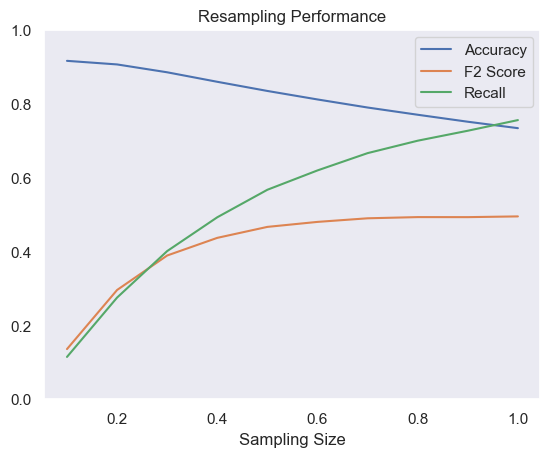

In [240]:
get_performance_visualisation("SMOTE",  X_val, y_val, LR2, dic_SMOTE)

Sampling Size: 0.1

Confusion Matrix: 
 [[42810  3703]
 [ 2392  1948]]
TN: 42810, FP: 3703, FN: 2392, TP: 1948


Accuracy:  0.8801447308909995
Recall:  0.4488479262672811
F2:  0.42327582460562346

Sampling Size: 0.2

Confusion Matrix: 
 [[39365  7148]
 [ 1666  2674]]
TN: 39365, FP: 7148, FN: 1666, TP: 2674


Accuracy:  0.8266768922187482
Recall:  0.6161290322580645
F2:  0.4918696196012067

Sampling Size: 0.3

Confusion Matrix: 
 [[36896  9617]
 [ 1279  3061]]
TN: 36896, FP: 9617, FN: 1279, TP: 3061


Accuracy:  0.7857353548463217
Recall:  0.7052995391705069
F2:  0.5095212730541314

Sampling Size: 0.4

Confusion Matrix: 
 [[35014 11499]
 [ 1061  3279]]
TN: 35014, FP: 11499, FN: 1061, TP: 3279


Accuracy:  0.7530135881855544
Recall:  0.7555299539170507
F2:  0.5101437550563196

Sampling Size: 0.5

Confusion Matrix: 
 [[33370 13143]
 [  894  3446]]
TN: 33370, FP: 13143, FN: 894, TP: 3446


Accuracy:  0.7239690873694767
Recall:  0.7940092165898618
F2:  0.5075259948746649

Sampling Size: 0.6

,Accuracy,F2 Score,Recall,Sampling Size
0,0.880145,0.423276,0.448848,0.1
1,0.826677,0.491870,0.616129,0.2
2,0.785735,0.509521,0.705300,0.3
3,0.753014,0.510144,0.755530,0.4
4,0.723969,0.507526,0.794009,0.5
5,0.702653,0.503561,0.817742,0.6
6,0.681494,0.498781,0.838940,0.7
7,0.664032,0.493161,0.852304,0.8


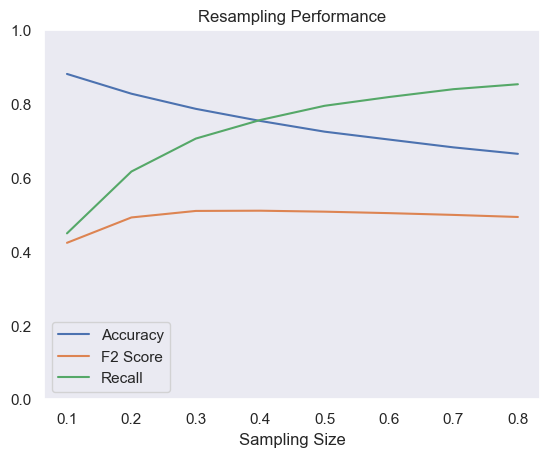

In [241]:
get_performance_visualisation("SMOTEENN", X_val, y_val, LR2, dic_SMOTEENN)

Sampling Size: 1

Confusion Matrix: 
 [[46109   404]
 [ 3892   448]]
TN: 46109, FP: 404, FN: 3892, TP: 448


Accuracy:  0.9155212081883075
Recall:  0.1032258064516129
F2:  0.12299582692730068

Sampling Size: 2

Confusion Matrix: 
 [[45085  1428]
 [ 3190  1150]]
TN: 45085, FP: 1428, FN: 3190, TP: 1150


Accuracy:  0.9091892317070772
Recall:  0.26497695852534564
F2:  0.2883940214665463

Sampling Size: 3

Confusion Matrix: 
 [[43752  2761]
 [ 2656  1684]]
TN: 43752, FP: 2761, FN: 2656, TP: 1684


Accuracy:  0.8934772776434036
Recall:  0.3880184331797235
F2:  0.38614996560421916

Sampling Size: 4

Confusion Matrix: 
 [[42402  4111]
 [ 2267  2073]]
TN: 42402, FP: 4111, FN: 2267, TP: 2073


Accuracy:  0.8745796708158811
Recall:  0.47764976958525346
F2:  0.4402395514780836

Sampling Size: 5

Confusion Matrix: 
 [[41037  5476]
 [ 1956  2384]]
TN: 41037, FP: 5476, FN: 1956, TP: 2384


Accuracy:  0.8538532633276307
Recall:  0.5493087557603686
F2:  0.47264076130055516

Sampling Size: 6

Confusion

,Accuracy,F2 Score,Recall,Minority Weight
0,0.915521,0.122996,0.103226,1
1,0.909189,0.288394,0.264977,2
2,0.893477,0.386150,0.388018,3
3,0.874580,0.440240,0.477650,4
4,0.853853,0.472641,0.549309,5
5,0.833972,0.494037,0.608986,6
6,0.815330,0.505216,0.653917,7
7,0.795489,0.511344,0.693779,8
8,0.778951,0.514323,0.723963,9
9,0.762453,0.514366,0.749078,10


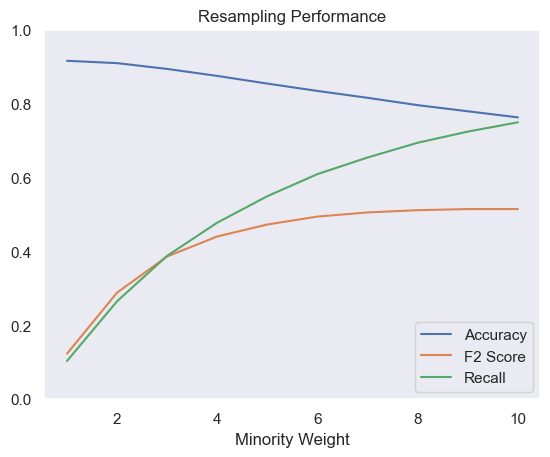

In [242]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LogisticRegression)

### XGB Classifier

In [243]:
xgb2 = XGBClassifier(random_state=19)

Sampling Size: 0.1

Confusion Matrix: 
 [[46110   403]
 [ 3897   443]]
TN: 46110, FP: 403, FN: 3897, TP: 443


Accuracy:  0.9154425500953729
Recall:  0.10207373271889401
F2:  0.1216631879600132

Sampling Size: 0.2

Confusion Matrix: 
 [[45909   604]
 [ 3772   568]]
TN: 45909, FP: 604, FN: 3772, TP: 568


Accuracy:  0.9139480463296168
Recall:  0.13087557603686636
F2:  0.15324843513921865

Sampling Size: 0.3

Confusion Matrix: 
 [[45534   979]
 [ 3603   737]]
TN: 45534, FP: 979, FN: 3603, TP: 737


Accuracy:  0.9098971545434881
Recall:  0.16981566820276497
F2:  0.1931746697420843

Sampling Size: 0.4

Confusion Matrix: 
 [[45136  1377]
 [ 3440   900]]
TN: 45136, FP: 1377, FN: 3440, TP: 900


Accuracy:  0.9052759915835841
Recall:  0.2073732718894009
F2:  0.229159240209808

Sampling Size: 0.5

Confusion Matrix: 
 [[44685  1828]
 [ 3296  1044]]
TN: 44685, FP: 1828, FN: 3296, TP: 1044


Accuracy:  0.8992389829508584
Recall:  0.24055299539170508
F2:  0.2580071174377224

Sampling Size: 0.6

Con

,Accuracy,F2 Score,Recall,Sampling Size
0,0.915443,0.121663,0.102074,0.1
1,0.913948,0.153248,0.130876,0.2
2,0.909897,0.193175,0.169816,0.3
3,0.905276,0.229159,0.207373,0.4
4,0.899239,0.258007,0.240553,0.5
5,0.892809,0.277898,0.266129,0.6
6,0.888718,0.301332,0.294931,0.7
7,0.880676,0.316218,0.318433,0.8
8,0.877982,0.319603,0.324654,0.9
9,0.873085,0.332948,0.344700,1.0


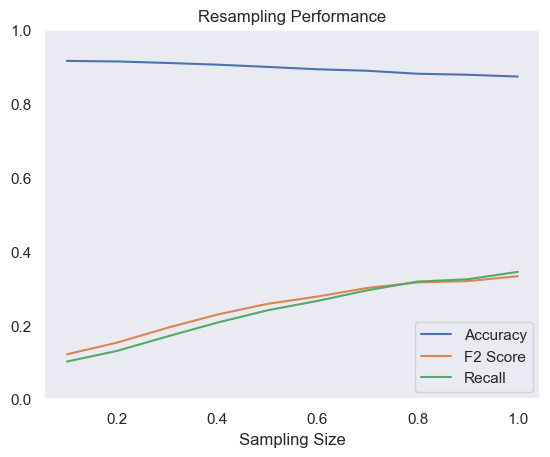

In [244]:
get_performance_visualisation("SMOTE", X_val, y_val, xgb2, dic_SMOTE)

Sampling Size: 0.1

Confusion Matrix: 
 [[42546  3967]
 [ 2320  2020]]
TN: 42546, FP: 3967, FN: 2320, TP: 2020


Accuracy:  0.8763691424301417
Recall:  0.46543778801843316
F2:  0.4326037606544738

Sampling Size: 0.2

Confusion Matrix: 
 [[41136  5377]
 [ 2001  2339]]
TN: 41136, FP: 5377, FN: 2001, TP: 2339


Accuracy:  0.8549151475822468
Recall:  0.5389400921658987
F2:  0.46638219811772214

Sampling Size: 0.3

Confusion Matrix: 
 [[40068  6445]
 [ 1784  2556]]
TN: 40068, FP: 6445, FN: 1784, TP: 2556


Accuracy:  0.8381806383104241
Recall:  0.5889400921658986
F2:  0.4848071013997951

Sampling Size: 0.4

Confusion Matrix: 
 [[39233  7280]
 [ 1663  2677]]
TN: 39233, FP: 7280, FN: 1663, TP: 2677


Accuracy:  0.8241401687216093
Recall:  0.6168202764976959
F2:  0.4899879196104989

Sampling Size: 0.5

Confusion Matrix: 
 [[38545  7968]
 [ 1569  2771]]
TN: 38545, FP: 7968, FN: 1569, TP: 2771


Accuracy:  0.8124594419208306
Recall:  0.6384792626728111
F2:  0.4930780454820456

Sampling Size: 0.6

,Accuracy,F2 Score,Recall,Sampling Size
0,0.876369,0.432604,0.465438,0.1
1,0.854915,0.466382,0.538940,0.2
2,0.838181,0.484807,0.588940,0.3
3,0.824140,0.489988,0.616820,0.4
4,0.812459,0.493078,0.638479,0.5
5,0.805774,0.495219,0.651613,0.6
6,0.796787,0.495571,0.665207,0.7
7,0.789629,0.497332,0.678571,0.8


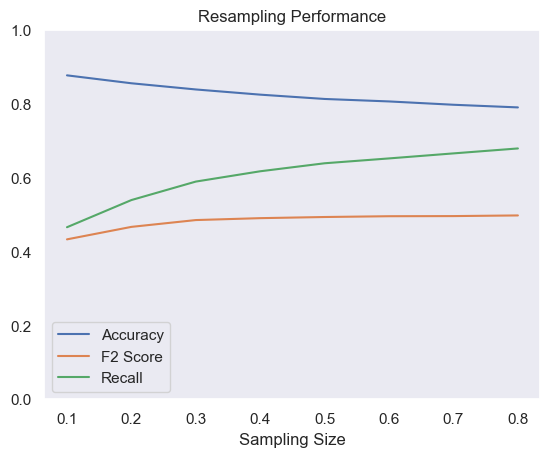

In [245]:
get_performance_visualisation("SMOTEENN", X_val, y_val,xgb2, dic_SMOTEENN)

Sampling Size: 1

Confusion Matrix: 
 [[46091   422]
 [ 3922   418]]
TN: 46091, FP: 422, FN: 3922, TP: 418


Accuracy:  0.914577311073093
Recall:  0.09631336405529954
F2:  0.11483516483516483

Sampling Size: 2

Confusion Matrix: 
 [[45003  1510]
 [ 3216  1124]]
TN: 45003, FP: 1510, FN: 3216, TP: 1124


Accuracy:  0.9070654631978448
Recall:  0.2589861751152074
F2:  0.2810843252975893

Sampling Size: 3

Confusion Matrix: 
 [[43556  2957]
 [ 2653  1687]]
TN: 43556, FP: 2957, FN: 2653, TP: 1687


Accuracy:  0.8896820246593121
Recall:  0.38870967741935486
F2:  0.3833393928376659

Sampling Size: 4

Confusion Matrix: 
 [[42167  4346]
 [ 2287  2053]]
TN: 42167, FP: 4346, FN: 2287, TP: 2053


Accuracy:  0.8695652173913043
Recall:  0.4730414746543779
F2:  0.432046803316638

Sampling Size: 5

Confusion Matrix: 
 [[40782  5731]
 [ 1954  2386]]
TN: 40782, FP: 5731, FN: 1954, TP: 2386


Accuracy:  0.8488781389495211
Recall:  0.5497695852534562
F2:  0.46826549436746867

Sampling Size: 6

Confusion Ma

,Accuracy,F2 Score,Recall,Minority Weight
0,0.914577,0.114835,0.096313,1
1,0.907065,0.281084,0.258986,2
2,0.889682,0.383339,0.388710,3
3,0.869565,0.432047,0.473041,4
4,0.848878,0.468265,0.549770,5
5,0.825005,0.487384,0.611521,6
6,0.809470,0.499348,0.652995,7
7,0.791536,0.503702,0.686636,8
8,0.776749,0.507635,0.715438,9
9,0.761784,0.507894,0.738249,10


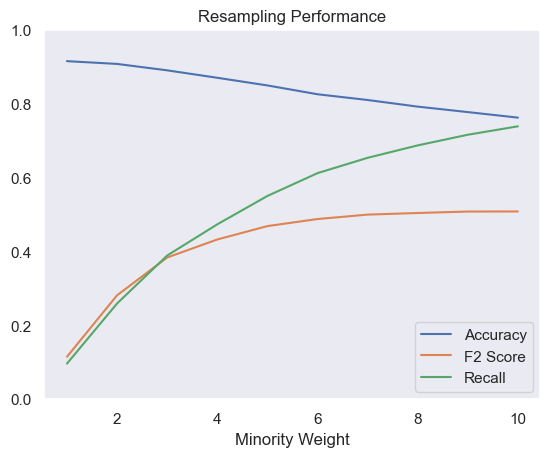

In [246]:
get_performance_weighing('scale', X_train, X_val, y_train, y_val, XGBClassifier)

### SVC Resampling

In [247]:
svc2 = LinearSVC(random_state=19)

Sampling Size: 0.1

Confusion Matrix: 
 [[46348   165]
 [ 4116   224]]
TN: 46348, FP: 165, FN: 4116, TP: 224


Accuracy:  0.915816176036812
Recall:  0.05161290322580645
F2:  0.06310214659980844

Sampling Size: 0.2

Confusion Matrix: 
 [[45338  1175]
 [ 3377   963]]
TN: 45338, FP: 1175, FN: 3377, TP: 963


Accuracy:  0.9104870902404971
Recall:  0.22188940092165899
F2:  0.24694840496461176

Sampling Size: 0.3

Confusion Matrix: 
 [[43645  2868]
 [ 2732  1608]]
TN: 43645, FP: 2868, FN: 2732, TP: 1608


Accuracy:  0.8898786698916484
Recall:  0.3705069124423963
F2:  0.3681993039018135

Sampling Size: 0.4

Confusion Matrix: 
 [[41839  4674]
 [ 2255  2085]]
TN: 41839, FP: 4674, FN: 2255, TP: 2085


Accuracy:  0.8637445185141486
Recall:  0.4804147465437788
F2:  0.4322318504083917

Sampling Size: 0.5

Confusion Matrix: 
 [[40130  6383]
 [ 1914  2426]]
TN: 40130, FP: 6383, FN: 1914, TP: 2426


Accuracy:  0.836843450730537
Recall:  0.5589861751152074
F2:  0.46352554549275865

Sampling Size: 0.6



,Accuracy,F2 Score,Recall,Sampling Size
0,0.915816,0.063102,0.051613,0.1
1,0.910487,0.246948,0.221889,0.2
2,0.889879,0.368199,0.370507,0.3
3,0.863745,0.432232,0.480415,0.4
4,0.836843,0.463526,0.558986,0.5
5,0.812420,0.482273,0.621198,0.6
6,0.788842,0.490153,0.667512,0.7
7,0.768313,0.494664,0.704839,0.8
8,0.748038,0.494270,0.733410,0.9
9,0.729003,0.494718,0.761751,1.0


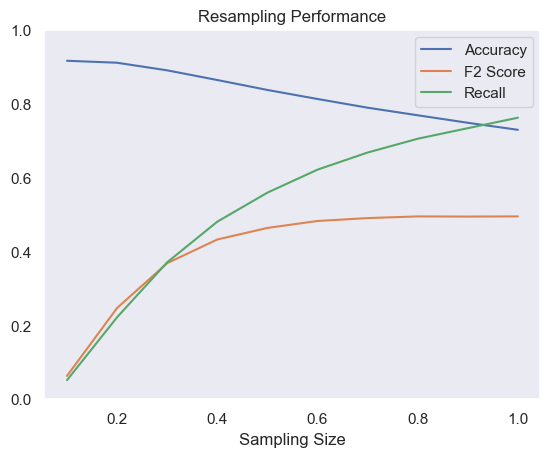

In [248]:
get_performance_visualisation("SMOTE", X_val, y_val, svc2, dic_SMOTE)

Sampling Size: 0.1

Confusion Matrix: 
 [[43424  3089]
 [ 2568  1772]]
TN: 43424, FP: 3089, FN: 2568, TP: 1772


Accuracy:  0.8887577920673313
Recall:  0.40829493087557606
F2:  0.39872192970613385

Sampling Size: 0.2

Confusion Matrix: 
 [[39841  6672]
 [ 1750  2590]]
TN: 39841, FP: 6672, FN: 1750, TP: 2590


Accuracy:  0.8343853853263328
Recall:  0.5967741935483871
F2:  0.48643978664262644

Sampling Size: 0.3

Confusion Matrix: 
 [[37109  9404]
 [ 1306  3034]]
TN: 37109, FP: 9404, FN: 1306, TP: 3034


Accuracy:  0.7893929561677777
Recall:  0.6990783410138249
F2:  0.5090945701053762

Sampling Size: 0.4

Confusion Matrix: 
 [[35097 11416]
 [ 1071  3269]]
TN: 35097, FP: 11416, FN: 1071, TP: 3269


Accuracy:  0.7544490983816098
Recall:  0.7532258064516129
F2:  0.5100639725386176

Sampling Size: 0.5

Confusion Matrix: 
 [[33399 13114]
 [  904  3436]]
TN: 33399, FP: 13114, FN: 904, TP: 3436


Accuracy:  0.7243427133109158
Recall:  0.791705069124424
F2:  0.5066352108522559

Sampling Size: 0.

,Accuracy,F2 Score,Recall,Sampling Size
0,0.888758,0.398722,0.408295,0.1
1,0.834385,0.486440,0.596774,0.2
2,0.789393,0.509095,0.699078,0.3
3,0.754449,0.510064,0.753226,0.4
4,0.724343,0.506635,0.791705,0.5
5,0.702908,0.503634,0.817512,0.6
6,0.679586,0.498334,0.840783,0.7
7,0.662281,0.493061,0.854608,0.8


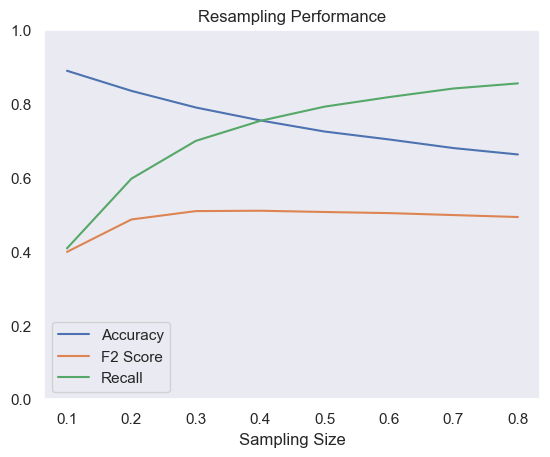

In [249]:
get_performance_visualisation("SMOTEENN", X_val, y_val, svc2, dic_SMOTEENN)

Sampling Size: 1

Confusion Matrix: 
 [[46373   140]
 [ 4143   197]]
TN: 46373, FP: 140, FN: 4143, TP: 197


Accuracy:  0.9157768469903447
Recall:  0.045391705069124426
F2:  0.0556591512685766

Sampling Size: 2

Confusion Matrix: 
 [[45435  1078]
 [ 3414   926]]
TN: 45435, FP: 1078, FN: 3414, TP: 926


Accuracy:  0.9116669616345152
Recall:  0.21336405529953917
F2:  0.23910349101425327

Sampling Size: 3

Confusion Matrix: 
 [[44129  2384]
 [ 2798  1542]]
TN: 44129, FP: 2384, FN: 2798, TP: 1542


Accuracy:  0.8980984406033076
Recall:  0.35529953917050694
F2:  0.3622099032227756

Sampling Size: 4

Confusion Matrix: 
 [[42763  3750]
 [ 2378  1962]]
TN: 42763, FP: 3750, FN: 2378, TP: 1962


Accuracy:  0.8794958016242896
Recall:  0.452073732718894
F2:  0.42519070735090153

Sampling Size: 5

Confusion Matrix: 
 [[41329  5184]
 [ 2018  2322]]
TN: 41329, FP: 5184, FN: 2018, TP: 2322


Accuracy:  0.8583761036713665
Recall:  0.5350230414746544
F2:  0.46690259792487737

Sampling Size: 6

Confusion

,Accuracy,F2 Score,Recall,Minority Weight
0,0.915777,0.055659,0.045392,1
1,0.911667,0.239103,0.213364,2
2,0.898098,0.362210,0.355300,3
3,0.879496,0.425191,0.452074,4
4,0.858376,0.466903,0.535023,5
5,0.837925,0.492181,0.600461,6
6,0.817592,0.505725,0.651382,7
7,0.797396,0.509915,0.688479,8
8,0.778853,0.513589,0.722811,9
9,0.761784,0.514064,0.749539,10


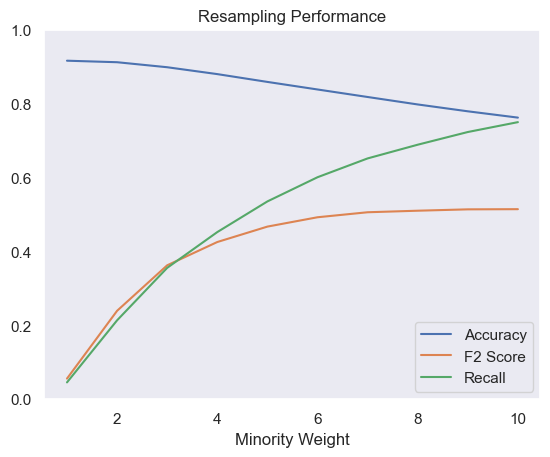

In [250]:
get_performance_weighing('dict', X_train, X_val, y_train, y_val, LinearSVC)

### Random Forest Classifier

In [251]:
rnd2 = RandomForestClassifier(random_state=19)

Sampling Size: 0.1

Confusion Matrix: 
 [[45359  1154]
 [ 3772   568]]
TN: 45359, FP: 1154, FN: 3772, TP: 568


Accuracy:  0.903132558551118
Recall:  0.13087557603686636
F2:  0.1488313593962897

Sampling Size: 0.2

Confusion Matrix: 
 [[44790  1723]
 [ 3560   780]]
TN: 44790, FP: 1723, FN: 3560, TP: 780


Accuracy:  0.8961123237567106
Recall:  0.17972350230414746
F2:  0.1963449629965262

Sampling Size: 0.3

Confusion Matrix: 
 [[44347  2166]
 [ 3473   867]]
TN: 44347, FP: 2166, FN: 3473, TP: 867


Accuracy:  0.8891117534855367
Recall:  0.19976958525345623
F2:  0.2125729416956799

Sampling Size: 0.4

Confusion Matrix: 
 [[44002  2511]
 [ 3362   978]]
TN: 44002, FP: 2511, FN: 3362, TP: 978


Accuracy:  0.8845102550488664
Recall:  0.22534562211981568
F2:  0.2345436231953571

Sampling Size: 0.5

Confusion Matrix: 
 [[43731  2782]
 [ 3327  1013]]
TN: 43731, FP: 2782, FN: 3327, TP: 1013


Accuracy:  0.8798694275657287
Recall:  0.23341013824884793
F2:  0.23942330418340818

Sampling Size: 0.6


,Accuracy,F2 Score,Recall,Sampling Size
0,0.903133,0.148831,0.130876,0.1
1,0.896112,0.196345,0.179724,0.2
2,0.889112,0.212573,0.199770,0.3
3,0.884510,0.234544,0.225346,0.4
4,0.879869,0.239423,0.233410,0.5
5,0.878198,0.255164,0.251613,0.6
6,0.874068,0.259734,0.259447,0.7
7,0.872574,0.264172,0.265438,0.8
8,0.869034,0.269112,0.273502,0.9
9,0.867697,0.274322,0.280415,1.0


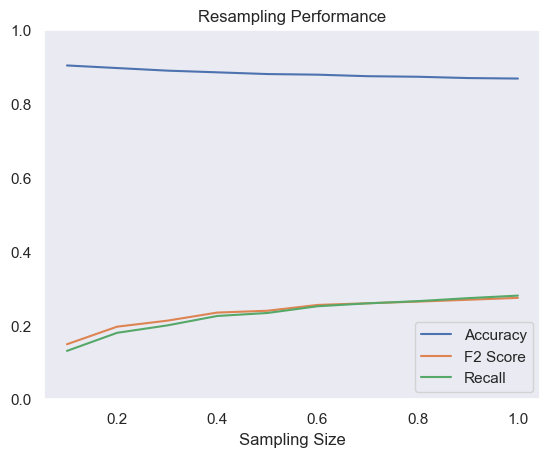

In [252]:
get_performance_visualisation("SMOTE", X_val, y_val, rnd2, dic_SMOTE)

Sampling Size: 0.1

Confusion Matrix: 
 [[40866  5647]
 [ 2155  2185]]
TN: 40866, FP: 5647, FN: 2155, TP: 2185


Accuracy:  0.846577389731186
Recall:  0.5034562211981567
F2:  0.43366941886313115

Sampling Size: 0.2

Confusion Matrix: 
 [[39115  7398]
 [ 1873  2467]]
TN: 39115, FP: 7398, FN: 1873, TP: 2467


Accuracy:  0.8176902051009773
Recall:  0.5684331797235023
F2:  0.4530762167125803

Sampling Size: 0.3

Confusion Matrix: 
 [[38013  8500]
 [ 1713  2627]]
TN: 38013, FP: 8500, FN: 1713, TP: 2627


Accuracy:  0.7991662242148939
Recall:  0.6052995391705069
F2:  0.461087513602696

Sampling Size: 0.4

Confusion Matrix: 
 [[37309  9204]
 [ 1618  2722]]
TN: 37309, FP: 9204, FN: 1618, TP: 2722


Accuracy:  0.7871905295656106
Recall:  0.6271889400921659
F2:  0.4647271733934303

Sampling Size: 0.5

Confusion Matrix: 
 [[36828  9685]
 [ 1562  2778]]
TN: 36828, FP: 9685, FN: 1562, TP: 2778


Accuracy:  0.7788331071913162
Recall:  0.6400921658986175
F2:  0.4657479126848406

Sampling Size: 0.6

C

,Accuracy,F2 Score,Recall,Sampling Size
0,0.846577,0.433669,0.503456,0.1
1,0.817690,0.453076,0.568433,0.2
2,0.799166,0.461088,0.605300,0.3
3,0.787191,0.464727,0.627189,0.4
4,0.778833,0.465748,0.640092,0.5
5,0.771616,0.466015,0.650230,0.6
6,0.764675,0.464366,0.656682,0.7
7,0.760840,0.466832,0.666129,0.8


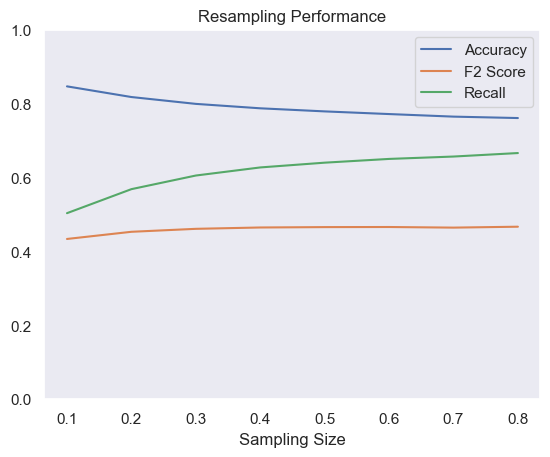

In [253]:
get_performance_visualisation("SMOTEENN",X_val, y_val, rnd2, dic_SMOTEENN)

Sampling Size: 1

Confusion Matrix: 
 [[45472  1041]
 [ 3806   534]]
TN: 45472, FP: 1041, FN: 3806, TP: 534


Accuracy:  0.904686055886575
Recall:  0.12304147465437788
F2:  0.14100871402165302

Sampling Size: 2

Confusion Matrix: 
 [[45466  1047]
 [ 3817   523]]
TN: 45466, FP: 1047, FN: 3817, TP: 523


Accuracy:  0.9043517589916032
Recall:  0.12050691244239631
F2:  0.1381405176967776

Sampling Size: 3

Confusion Matrix: 
 [[45431  1082]
 [ 3828   512]]
TN: 45431, FP: 1082, FN: 3828, TP: 512


Accuracy:  0.9034471909228561
Recall:  0.11797235023041475
F2:  0.13506383876754247

Sampling Size: 4

Confusion Matrix: 
 [[45438  1075]
 [ 3836   504]]
TN: 45438, FP: 1075, FN: 3836, TP: 504


Accuracy:  0.9034275263996224
Recall:  0.11612903225806452
F2:  0.13305876762236654

Sampling Size: 5

Confusion Matrix: 
 [[45419  1094]
 [ 3835   505]]
TN: 45419, FP: 1094, FN: 3835, TP: 505


Accuracy:  0.903073564981417
Recall:  0.11635944700460829
F2:  0.13318212985916977

Sampling Size: 6

Confusion 

,Accuracy,F2 Score,Recall,Minority Weight
0,0.904686,0.141009,0.123041,1
1,0.904352,0.138141,0.120507,2
2,0.903447,0.135064,0.117972,3
3,0.903428,0.133059,0.116129,4
4,0.903074,0.133182,0.116359,5
5,0.902739,0.130065,0.113594,6
6,0.902405,0.130449,0.114055,7
7,0.902680,0.132293,0.115668,8
8,0.902759,0.129822,0.113364,9
9,0.902464,0.130219,0.113825,10


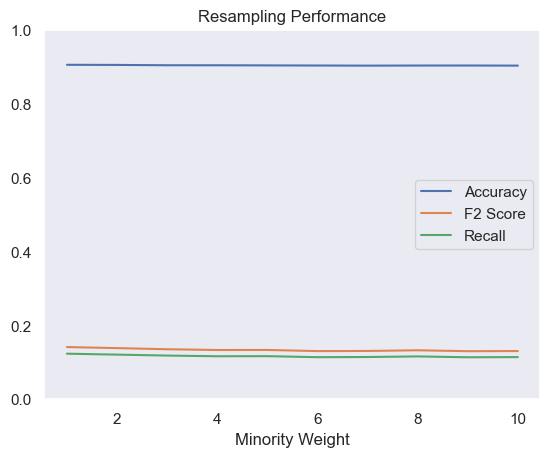

In [254]:
get_performance_weighing('dict', X_train, X_val, y_train, y_val, RandomForestClassifier)

# Fine Tuning

### Fine Tuning for XGB using Bayesian Hyperparameter Tuning

In [255]:
# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

# for timing
from time import time
from tqdm import tqdm

import os
import pickle

In [256]:
def evaluate_F2(X_train, X_val, y_train, y_val, classifier):
    
    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)

    # Evaluate results
    F2 = fbeta_score(y_test, y_preds, beta=2)
    return F2

In [257]:
def hyperopt(param_space, num_eval, classifier):  
    start = time()
    def objective_function(params):
        clf = classifier(**params)
        score = evaluate_F2(X_train, X_val, y_train, y_val, clf) 
        
        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval, 
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials] 
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [258]:
# XGB Bayesian hyperopt

num_eval = 50

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['dart','gbtree']), 
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

In [306]:
load = True #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt = hyperopt(XGB_param_hyperopt,  num_eval, XGBClassifier)
    save_file('Tuning/XGB_hyperopt.pkl', XGB_hyperopt)
else:
    try:
        XGB_hyperopt = load_file('Tuning/XGB_hyperopt.pkl')
    except Exception as e:
        print(e)

In [307]:
XGB_hyperopt[1]

{'booster': 1,
 'colsample_bylevel': 0.3022225862596074,
 'colsample_bynode': 0.10007166043789618,
 'colsample_bytree': 0.41776421631566996,
 'gamma': 6.560748274427809,
 'learning_rate': 0.1527758224322273,
 'max_depth': 7.0,
 'min_child_weight': 2.377742411129629,
 'n_estimators': 380.0,
 'reg_alpha': 0.020382477912415903,
 'reg_lambda': 3.524644536491442,
 'scale_pos_weight': 9.262553000560938,
 'subsample': 0.1377042004158701}

In [288]:
trials = XGB_hyperopt[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)
    
bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [289]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
25,-0.517927,[1],[0.3022225862596074],[0.10007166043789618],[0.41776421631566996],[6.560748274427809],[0.1527758224322273],[7.0],[2.377742411129629],[380.0],[0.020382477912415903],[3.524644536491442],[9.262553000560938],[0.1377042004158701]
31,-0.517650,[1],[0.31121025663730756],[0.14151837912106152],[0.4605166477407381],[2.9283982170729503],[0.1470071940075872],[18.0],[2.4494498865377907],[440.0],[0.0446520817870522],[2.97528625550121],[9.97880536446865],[0.30661662229735315]
36,-0.517241,[1],[0.2878859458516162],[0.39274774214026015],[0.33508384662624974],[3.358069031507729],[0.2332939218581861],[3.0],[2.4444209791815896],[400.0],[0.041697544905629116],[2.5660198880347305],[9.60271028180117],[0.3642291803950978]
21,-0.517220,[1],[0.39203902075142516],[0.11451726214081973],[0.3047279413123041],[6.0790383714297755],[0.16273304025510005],[11.0],[2.4699690279912256],[440.0],[0.09898035825044184],[3.7477142820275113],[9.984330807329979],[0.14605951711772147]
44,-0.516618,[0],[0.20359696624697465],[0.17758042136817043],[0.6174874731782579],[8.397667417884566],[0.2216762621101789],[4.0],[2.355964030555093],[420.0],[0.04855291563076629],[4.081523490780989],[9.042411051617798],[0.3687100335696501]
29,-0.516272,[1],[0.102653115902166],[0.40805070641403574],[0.22825441685196407],[4.386766966111323],[0.3481480854711228],[11.0],[2.299064014030787],[400.0],[0.08100450114510832],[4.733475735671827],[8.95496079684243],[0.4974400448783074]
13,-0.516166,[1],[0.36465368710282975],[0.10018977618970402],[0.3186658412500163],[19.484813659829996],[0.12207591165287521],[8.0],[1.572700116977674],[480.0],[0.028729174510226142],[4.4174933546860675],[9.238106353534763],[0.1469204986707886]
42,-0.516164,[1],[0.2359433071895886],[0.30754281451976767],[0.3817438929509363],[9.827174873163974],[0.10913328438377085],[7.0],[2.0701668676033433],[480.0],[0.06445108957250152],[3.0401727437080743],[8.563699735597874],[0.2099069674811091]
8,-0.515657,[1],[0.3301137182779952],[0.5245960421579748],[0.3596907879872142],[9.52814511500232],[0.09767520650416894],[9.0],[2.1612739861029864],[300.0],[0.06501111305418991],[2.5147888789122392],[9.467841745213128],[0.24935047171456867]
24,-0.515135,[1],[0.3984210204223223],[0.27146528786181506],[0.41045580676288146],[4.160920467228303],[0.05002263102838701],[19.0],[1.6659756648053756],[460.0],[0.09967990422442956],[4.4148758906402366],[9.983385822345788],[0.10023361201576074]


In [290]:
xg_chosen = XGB_hyperopt[1]

xgboost_model_1   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen['booster']], 
                                  colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'], 
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = int(xg_chosen['n_estimators']),
                                  reg_alpha = xg_chosen['reg_alpha'], 
                                  reg_lambda = xg_chosen['reg_lambda'],
                                  max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'], 
                                  gamma = xg_chosen['gamma'], 
                                  min_child_weight = xg_chosen['min_child_weight'],
                                  scale_pos_weight = xg_chosen['scale_pos_weight'],
                                  learning_rate=xg_chosen['learning_rate'],
                                  random_state=19)

In [291]:
xgboost_model_1

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.3022225862596074,
              colsample_bynode=0.10007166043789618,
              colsample_bytree=0.41776421631566996, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=6.560748274427809, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1527758224322273, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=2.377742411129629, missing=nan,
              monotone_constraints=None, n_estimators=380, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19,
              reg_alpha=0.020382477912415903, reg_lambda=3.524644536491442, ...)

### Second Round of Tuning

In [292]:
parameters = xg_chosen.keys()

In [293]:
sorted_results = bayesTrialsData.sort_values('loss')
sorted_results

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
25,-0.517927,[1],[0.3022225862596074],[0.10007166043789618],[0.41776421631566996],[6.560748274427809],[0.1527758224322273],[7.0],[2.377742411129629],[380.0],[0.020382477912415903],[3.524644536491442],[9.262553000560938],[0.1377042004158701]
31,-0.517650,[1],[0.31121025663730756],[0.14151837912106152],[0.4605166477407381],[2.9283982170729503],[0.1470071940075872],[18.0],[2.4494498865377907],[440.0],[0.0446520817870522],[2.97528625550121],[9.97880536446865],[0.30661662229735315]
36,-0.517241,[1],[0.2878859458516162],[0.39274774214026015],[0.33508384662624974],[3.358069031507729],[0.2332939218581861],[3.0],[2.4444209791815896],[400.0],[0.041697544905629116],[2.5660198880347305],[9.60271028180117],[0.3642291803950978]
21,-0.517220,[1],[0.39203902075142516],[0.11451726214081973],[0.3047279413123041],[6.0790383714297755],[0.16273304025510005],[11.0],[2.4699690279912256],[440.0],[0.09898035825044184],[3.7477142820275113],[9.984330807329979],[0.14605951711772147]
44,-0.516618,[0],[0.20359696624697465],[0.17758042136817043],[0.6174874731782579],[8.397667417884566],[0.2216762621101789],[4.0],[2.355964030555093],[420.0],[0.04855291563076629],[4.081523490780989],[9.042411051617798],[0.3687100335696501]
29,-0.516272,[1],[0.102653115902166],[0.40805070641403574],[0.22825441685196407],[4.386766966111323],[0.3481480854711228],[11.0],[2.299064014030787],[400.0],[0.08100450114510832],[4.733475735671827],[8.95496079684243],[0.4974400448783074]
13,-0.516166,[1],[0.36465368710282975],[0.10018977618970402],[0.3186658412500163],[19.484813659829996],[0.12207591165287521],[8.0],[1.572700116977674],[480.0],[0.028729174510226142],[4.4174933546860675],[9.238106353534763],[0.1469204986707886]
42,-0.516164,[1],[0.2359433071895886],[0.30754281451976767],[0.3817438929509363],[9.827174873163974],[0.10913328438377085],[7.0],[2.0701668676033433],[480.0],[0.06445108957250152],[3.0401727437080743],[8.563699735597874],[0.2099069674811091]
8,-0.515657,[1],[0.3301137182779952],[0.5245960421579748],[0.3596907879872142],[9.52814511500232],[0.09767520650416894],[9.0],[2.1612739861029864],[300.0],[0.06501111305418991],[2.5147888789122392],[9.467841745213128],[0.24935047171456867]
24,-0.515135,[1],[0.3984210204223223],[0.27146528786181506],[0.41045580676288146],[4.160920467228303],[0.05002263102838701],[19.0],[1.6659756648053756],[460.0],[0.09967990422442956],[4.4148758906402366],[9.983385822345788],[0.10023361201576074]


In [294]:
sorted_results.reset_index(inplace=True)

In [295]:
sorted_results

,index,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
0,25,-0.517927,[1],[0.3022225862596074],[0.10007166043789618],[0.41776421631566996],[6.560748274427809],[0.1527758224322273],[7.0],[2.377742411129629],[380.0],[0.020382477912415903],[3.524644536491442],[9.262553000560938],[0.1377042004158701]
1,31,-0.517650,[1],[0.31121025663730756],[0.14151837912106152],[0.4605166477407381],[2.9283982170729503],[0.1470071940075872],[18.0],[2.4494498865377907],[440.0],[0.0446520817870522],[2.97528625550121],[9.97880536446865],[0.30661662229735315]
2,36,-0.517241,[1],[0.2878859458516162],[0.39274774214026015],[0.33508384662624974],[3.358069031507729],[0.2332939218581861],[3.0],[2.4444209791815896],[400.0],[0.041697544905629116],[2.5660198880347305],[9.60271028180117],[0.3642291803950978]
3,21,-0.517220,[1],[0.39203902075142516],[0.11451726214081973],[0.3047279413123041],[6.0790383714297755],[0.16273304025510005],[11.0],[2.4699690279912256],[440.0],[0.09898035825044184],[3.7477142820275113],[9.984330807329979],[0.14605951711772147]
4,44,-0.516618,[0],[0.20359696624697465],[0.17758042136817043],[0.6174874731782579],[8.397667417884566],[0.2216762621101789],[4.0],[2.355964030555093],[420.0],[0.04855291563076629],[4.081523490780989],[9.042411051617798],[0.3687100335696501]
5,29,-0.516272,[1],[0.102653115902166],[0.40805070641403574],[0.22825441685196407],[4.386766966111323],[0.3481480854711228],[11.0],[2.299064014030787],[400.0],[0.08100450114510832],[4.733475735671827],[8.95496079684243],[0.4974400448783074]
6,13,-0.516166,[1],[0.36465368710282975],[0.10018977618970402],[0.3186658412500163],[19.484813659829996],[0.12207591165287521],[8.0],[1.572700116977674],[480.0],[0.028729174510226142],[4.4174933546860675],[9.238106353534763],[0.1469204986707886]
7,42,-0.516164,[1],[0.2359433071895886],[0.30754281451976767],[0.3817438929509363],[9.827174873163974],[0.10913328438377085],[7.0],[2.0701668676033433],[480.0],[0.06445108957250152],[3.0401727437080743],[8.563699735597874],[0.2099069674811091]
8,8,-0.515657,[1],[0.3301137182779952],[0.5245960421579748],[0.3596907879872142],[9.52814511500232],[0.09767520650416894],[9.0],[2.1612739861029864],[300.0],[0.06501111305418991],[2.5147888789122392],[9.467841745213128],[0.24935047171456867]
9,24,-0.515135,[1],[0.3984210204223223],[0.27146528786181506],[0.41045580676288146],[4.160920467228303],[0.05002263102838701],[19.0],[1.6659756648053756],[460.0],[0.09967990422442956],[4.4148758906402366],[9.983385822345788],[0.10023361201576074]


In [296]:
sorted_results.drop('index',axis=1,inplace=True)

In [297]:
top_10 = sorted_results.iloc[0:10]
top_10

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
0,-0.517927,[1],[0.3022225862596074],[0.10007166043789618],[0.41776421631566996],[6.560748274427809],[0.1527758224322273],[7.0],[2.377742411129629],[380.0],[0.020382477912415903],[3.524644536491442],[9.262553000560938],[0.1377042004158701]
1,-0.517650,[1],[0.31121025663730756],[0.14151837912106152],[0.4605166477407381],[2.9283982170729503],[0.1470071940075872],[18.0],[2.4494498865377907],[440.0],[0.0446520817870522],[2.97528625550121],[9.97880536446865],[0.30661662229735315]
2,-0.517241,[1],[0.2878859458516162],[0.39274774214026015],[0.33508384662624974],[3.358069031507729],[0.2332939218581861],[3.0],[2.4444209791815896],[400.0],[0.041697544905629116],[2.5660198880347305],[9.60271028180117],[0.3642291803950978]
3,-0.517220,[1],[0.39203902075142516],[0.11451726214081973],[0.3047279413123041],[6.0790383714297755],[0.16273304025510005],[11.0],[2.4699690279912256],[440.0],[0.09898035825044184],[3.7477142820275113],[9.984330807329979],[0.14605951711772147]
4,-0.516618,[0],[0.20359696624697465],[0.17758042136817043],[0.6174874731782579],[8.397667417884566],[0.2216762621101789],[4.0],[2.355964030555093],[420.0],[0.04855291563076629],[4.081523490780989],[9.042411051617798],[0.3687100335696501]
5,-0.516272,[1],[0.102653115902166],[0.40805070641403574],[0.22825441685196407],[4.386766966111323],[0.3481480854711228],[11.0],[2.299064014030787],[400.0],[0.08100450114510832],[4.733475735671827],[8.95496079684243],[0.4974400448783074]
6,-0.516166,[1],[0.36465368710282975],[0.10018977618970402],[0.3186658412500163],[19.484813659829996],[0.12207591165287521],[8.0],[1.572700116977674],[480.0],[0.028729174510226142],[4.4174933546860675],[9.238106353534763],[0.1469204986707886]
7,-0.516164,[1],[0.2359433071895886],[0.30754281451976767],[0.3817438929509363],[9.827174873163974],[0.10913328438377085],[7.0],[2.0701668676033433],[480.0],[0.06445108957250152],[3.0401727437080743],[8.563699735597874],[0.2099069674811091]
8,-0.515657,[1],[0.3301137182779952],[0.5245960421579748],[0.3596907879872142],[9.52814511500232],[0.09767520650416894],[9.0],[2.1612739861029864],[300.0],[0.06501111305418991],[2.5147888789122392],[9.467841745213128],[0.24935047171456867]
9,-0.515135,[1],[0.3984210204223223],[0.27146528786181506],[0.41045580676288146],[4.160920467228303],[0.05002263102838701],[19.0],[1.6659756648053756],[460.0],[0.09967990422442956],[4.4148758906402366],[9.983385822345788],[0.10023361201576074]


In [298]:
for i in parameters:
    minimum = top_10[i].min()
    maximum = top_10[i].max()
    print(i,'Min:',minimum,'Max:',maximum)

booster Min: [0] Max: [1]
colsample_bylevel Min: [0.102653115902166] Max: [0.3984210204223223]
colsample_bynode Min: [0.10007166043789618] Max: [0.5245960421579748]
colsample_bytree Min: [0.22825441685196407] Max: [0.6174874731782579]
gamma Min: [2.9283982170729503] Max: [19.484813659829996]
learning_rate Min: [0.05002263102838701] Max: [0.3481480854711228]
max_depth Min: [3.0] Max: [19.0]
min_child_weight Min: [1.572700116977674] Max: [2.4699690279912256]
n_estimators Min: [300.0] Max: [480.0]
reg_alpha Min: [0.020382477912415903] Max: [0.09967990422442956]
reg_lambda Min: [2.5147888789122392] Max: [4.733475735671827]
scale_pos_weight Min: [8.563699735597874] Max: [9.984330807329979]
subsample Min: [0.10023361201576074] Max: [0.4974400448783074]


In [299]:
# XGB Bayesian hyperopt2

num_eval_2 = 100


XGB_param_hyperopt2 = {
    'booster': hp.choice('booster', ['gbtree']), 
    'learning_rate': hp.uniform('learning_rate', top_10['learning_rate'].min()[0], top_10['learning_rate'].max()[0]),
    'max_depth': scope.int(hp.quniform('max_depth', top_10['max_depth'].min()[0], top_10['max_depth'].max()[0], 1)),
    'subsample': hp.uniform('subsample', top_10['subsample'].min()[0], top_10['subsample'].max()[0]),
    'colsample_bytree': hp.uniform('colsample_bytree', top_10['colsample_bytree'].min()[0], top_10['colsample_bytree'].max()[0]),
    'colsample_bynode': hp.uniform('colsample_bynode', top_10['colsample_bynode'].min()[0], top_10['colsample_bynode'].max()[0]),
    'colsample_bylevel': hp.uniform('colsample_bylevel', top_10['colsample_bylevel'].min()[0], top_10['colsample_bylevel'].max()[0]),
    'gamma': hp.uniform('gamma', top_10['gamma'].min()[0], top_10['gamma'].max()[0]),
    'min_child_weight': hp.uniform('min_child_weight', top_10['min_child_weight'].min()[0], top_10['min_child_weight'].max()[0]),
    'n_estimators': scope.int(hp.quniform('n_estimators', top_10['n_estimators'].min()[0], top_10['n_estimators'].max()[0], 20)),
    'reg_lambda': hp.uniform('reg_lambda', top_10['reg_lambda'].min()[0], top_10['reg_lambda'].max()[0]),
    'reg_alpha':hp.uniform('reg_alpha', top_10['reg_alpha'].min()[0], top_10['reg_alpha'].max()[0]),
    'scale_pos_weight':hp.uniform('scale_pos_weight', top_10['scale_pos_weight'].min()[0], top_10['scale_pos_weight'].max()[0])
}

In [301]:
load = True
if(load == False):
    XGB_hyperopt2 = hyperopt(XGB_param_hyperopt2,  num_eval_2, XGBClassifier)
    save_file('Tuning/XGB_hyperopt2.pkl', XGB_hyperopt2)
else:
    try:
        XGB_hyperopt2 = load_file('Tuning/XGB_hyperopt2.pkl')
    except Exception as e:
        print(e)

In [302]:
xg_chosen2 = XGB_hyperopt2[1]
xg_chosen2

{'booster': 0,
 'colsample_bylevel': 0.17294591447288324,
 'colsample_bynode': 0.30210251309481745,
 'colsample_bytree': 0.39092083704173214,
 'gamma': 16.77297222197923,
 'learning_rate': 0.19703070852868038,
 'max_depth': 8.0,
 'min_child_weight': 2.177602460621749,
 'n_estimators': 340.0,
 'reg_alpha': 0.0700010703631732,
 'reg_lambda': 3.150305422405373,
 'scale_pos_weight': 9.431082034685641,
 'subsample': 0.41255836902939685}

In [303]:
trials = XGB_hyperopt2[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']
    #print(loss,values)
    losses.append(loss)
    record.append(values)
    
bayesTrialsData2 = pd.DataFrame(record)

#if you have time try to make this part of the code more "pandas-like" - I just did an iteration for this
# I left the values as list.

bayesTrialsData2.insert(0, 'loss', losses)

In [304]:
bayesTrialsData2.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
71,-0.519630,[0],[0.17294591447288324],[0.30210251309481745],[0.39092083704173214],[16.77297222197923],[0.19703070852868038],[8.0],[2.177602460621749],[340.0],[0.0700010703631732],[3.150305422405373],[9.431082034685641],[0.41255836902939685]
3,-0.519583,[0],[0.1656264645742454],[0.1720769911499589],[0.3500382218731567],[11.180925047615474],[0.2709268554878882],[4.0],[1.9701697395929134],[320.0],[0.058011851215724004],[3.347041191636014],[9.44401242269845],[0.3640005938952858]
21,-0.519438,[0],[0.24039134988129549],[0.22633626650276256],[0.36279680944845505],[6.600398073673131],[0.19493148175168273],[6.0],[1.7661024820051643],[360.0],[0.0801843583499963],[2.519053368071737],[9.55627812144409],[0.4704976044396053]
50,-0.519061,[0],[0.1373328113194957],[0.30417030773385473],[0.2426224865887574],[14.419621046379834],[0.27110612892336433],[8.0],[2.467292610981494],[380.0],[0.0738697501283129],[2.653982803356783],[9.768644410116467],[0.47957201239145236]
23,-0.518932,[0],[0.24194520370277456],[0.15821312028624485],[0.26753133474638296],[9.941210403231992],[0.21964743414539772],[5.0],[1.8073127095860322],[340.0],[0.0969863760899429],[2.581605601619748],[9.453901648523235],[0.45431142350230624]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,-0.510789,[0],[0.10563457101285337],[0.25338467940214826],[0.35453018564607214],[9.602648674486367],[0.3257967601278484],[12.0],[1.744724914422245],[400.0],[0.05699200861191042],[4.316855309054553],[9.430561012872323],[0.42468795414589305]
92,-0.510268,[0],[0.12783002637276816],[0.3017228840572431],[0.4546121163785707],[10.106059024489248],[0.34801630483819823],[8.0],[1.9582495264545092],[380.0],[0.09786068329101398],[2.758444336652089],[9.739404346454336],[0.45075094638686714]
12,-0.509397,[0],[0.22859101678718038],[0.36627944429437015],[0.5223815424292091],[12.697715489566264],[0.27691895730643823],[16.0],[1.5871778430752215],[420.0],[0.0917737841310635],[2.9394195172546183],[9.100675077562883],[0.2468248061971502]
6,-0.504060,[0],[0.11139899388465553],[0.48117193250407975],[0.3638408488956948],[14.549171122027953],[0.32197443362403916],[18.0],[1.878550422234239],[420.0],[0.05232846625413818],[2.826316496656457],[9.040678199737256],[0.13999639443632023]


In [277]:
xg_chosen2 = XGB_hyperopt2[1]

xgboost_model_2   =   XGBClassifier(booster=['gbtree'][xg_chosen2['booster']], 
                                  colsample_bytree=xg_chosen2['colsample_bytree'],
                                  colsample_bynode = xg_chosen2['colsample_bynode'], 
                                  colsample_bylevel = xg_chosen2['colsample_bylevel'],
                                  n_estimators = int(xg_chosen2['n_estimators']),
                                  reg_alpha = xg_chosen2['reg_alpha'], 
                                  reg_lambda = xg_chosen2['reg_lambda'],
                                  max_depth=int(xg_chosen2['max_depth']),
                                  subsample = xg_chosen2['subsample'], 
                                  gamma = xg_chosen2['gamma'], 
                                  min_child_weight = xg_chosen2['min_child_weight'],
                                  scale_pos_weight = xg_chosen2['scale_pos_weight'],
                                  learning_rate=xg_chosen2['learning_rate'],
                                  random_state=19)

In [278]:
xgboost_model_2.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': 0.17294591447288324,
 'colsample_bynode': 0.30210251309481745,
 'colsample_bytree': 0.39092083704173214,
 'eval_metric': None,
 'gamma': 16.77297222197923,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.19703070852868038,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 8,
 'max_leaves': None,
 'min_child_weight': 2.177602460621749,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 19,
 'reg_alpha': 0.0700010703631732,
 'reg_lambda': 3.150305422405373,
 'sampling_method': None,
 'scale_pos_weight': 9.431082034685641,
 'subsample': 0.41255836902939685,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [279]:
train_model(X_train, X_test, y_train, y_test, xgboost_model_1)

Confusion Matrix: 
 [[44441 13700]
 [ 1308  4117]]
TN: 44441, FP: 13700, FN: 1308, TP: 4117


Accuracy:  0.7638989396847371
Recall:  0.7588940092165899
F2:  0.5209150492193233


(0.7638989396847371, 0.7588940092165899, 0.5209150492193233)

In [280]:
train_model(X_train, X_test, y_train, y_test, xgboost_model_2)

Confusion Matrix: 
 [[44414 13727]
 [ 1303  4122]]
TN: 44414, FP: 13727, FN: 1303, TP: 4122


Accuracy:  0.7635528427146587
Recall:  0.759815668202765
F2:  0.5211256921793219


(0.7635528427146587, 0.759815668202765, 0.5211256921793219)

In [281]:
feature_weight = xgboost_model_2.feature_importances_

In [282]:
weight_df = pd.DataFrame(feature_weight,index = x_var, columns=['weights'])

In [283]:
weight_df.sort_values('weights', ascending=False)

,weights
GenHealth_Excellent,0.102640
Diabetic_Yes,0.077825
AgeCategory_25-29,0.058307
AgeCategory_18-24,0.057241
GenHealth_Very good,0.056864
Stroke,0.052523
AgeCategory_30-34,0.046588
DiffWalking,0.040836
Sex,0.038694
AgeCategory_80 or older,0.035041


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

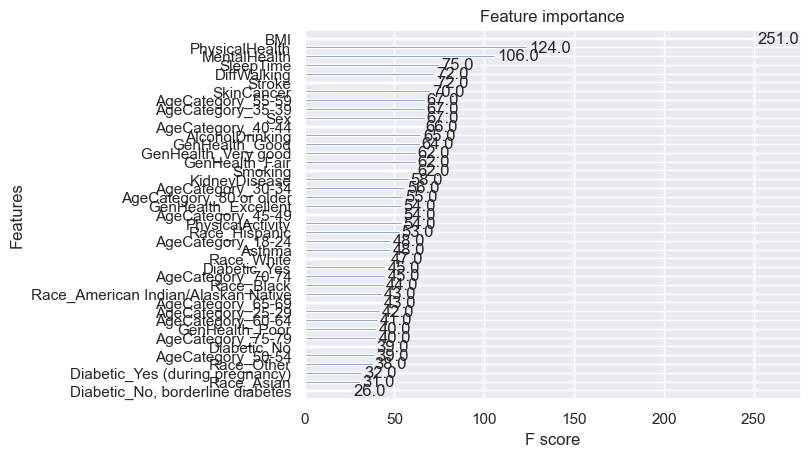

In [284]:
from xgboost import plot_importance
plot_importance(xgboost_model_2)